In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 779.8 kB/s eta 0:00:00


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.metrics import  precision_recall_curve
# Import classifiers

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier


# DATA UNDERSTANDING:

connect to drive to import necessary files

### Data Overview

In [4]:
df=pd.read_csv("/content/drive/MyDrive/WA_Fn-UseC_-HR-Employee-Attrition.csv")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df[['JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating']].describe()

,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741
std,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824
min,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000
25%,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000
50%,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000
75%,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000
max,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000


#### Checking null values:

In [ ]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### check duplicates:

In [ ]:

duplicates = df.duplicated()

In [ ]:
duplicates.sum()


0

As we see the data is before well cleaned no duplicates, no null values now let's check  the outliers and get closer to the data

### check outliers

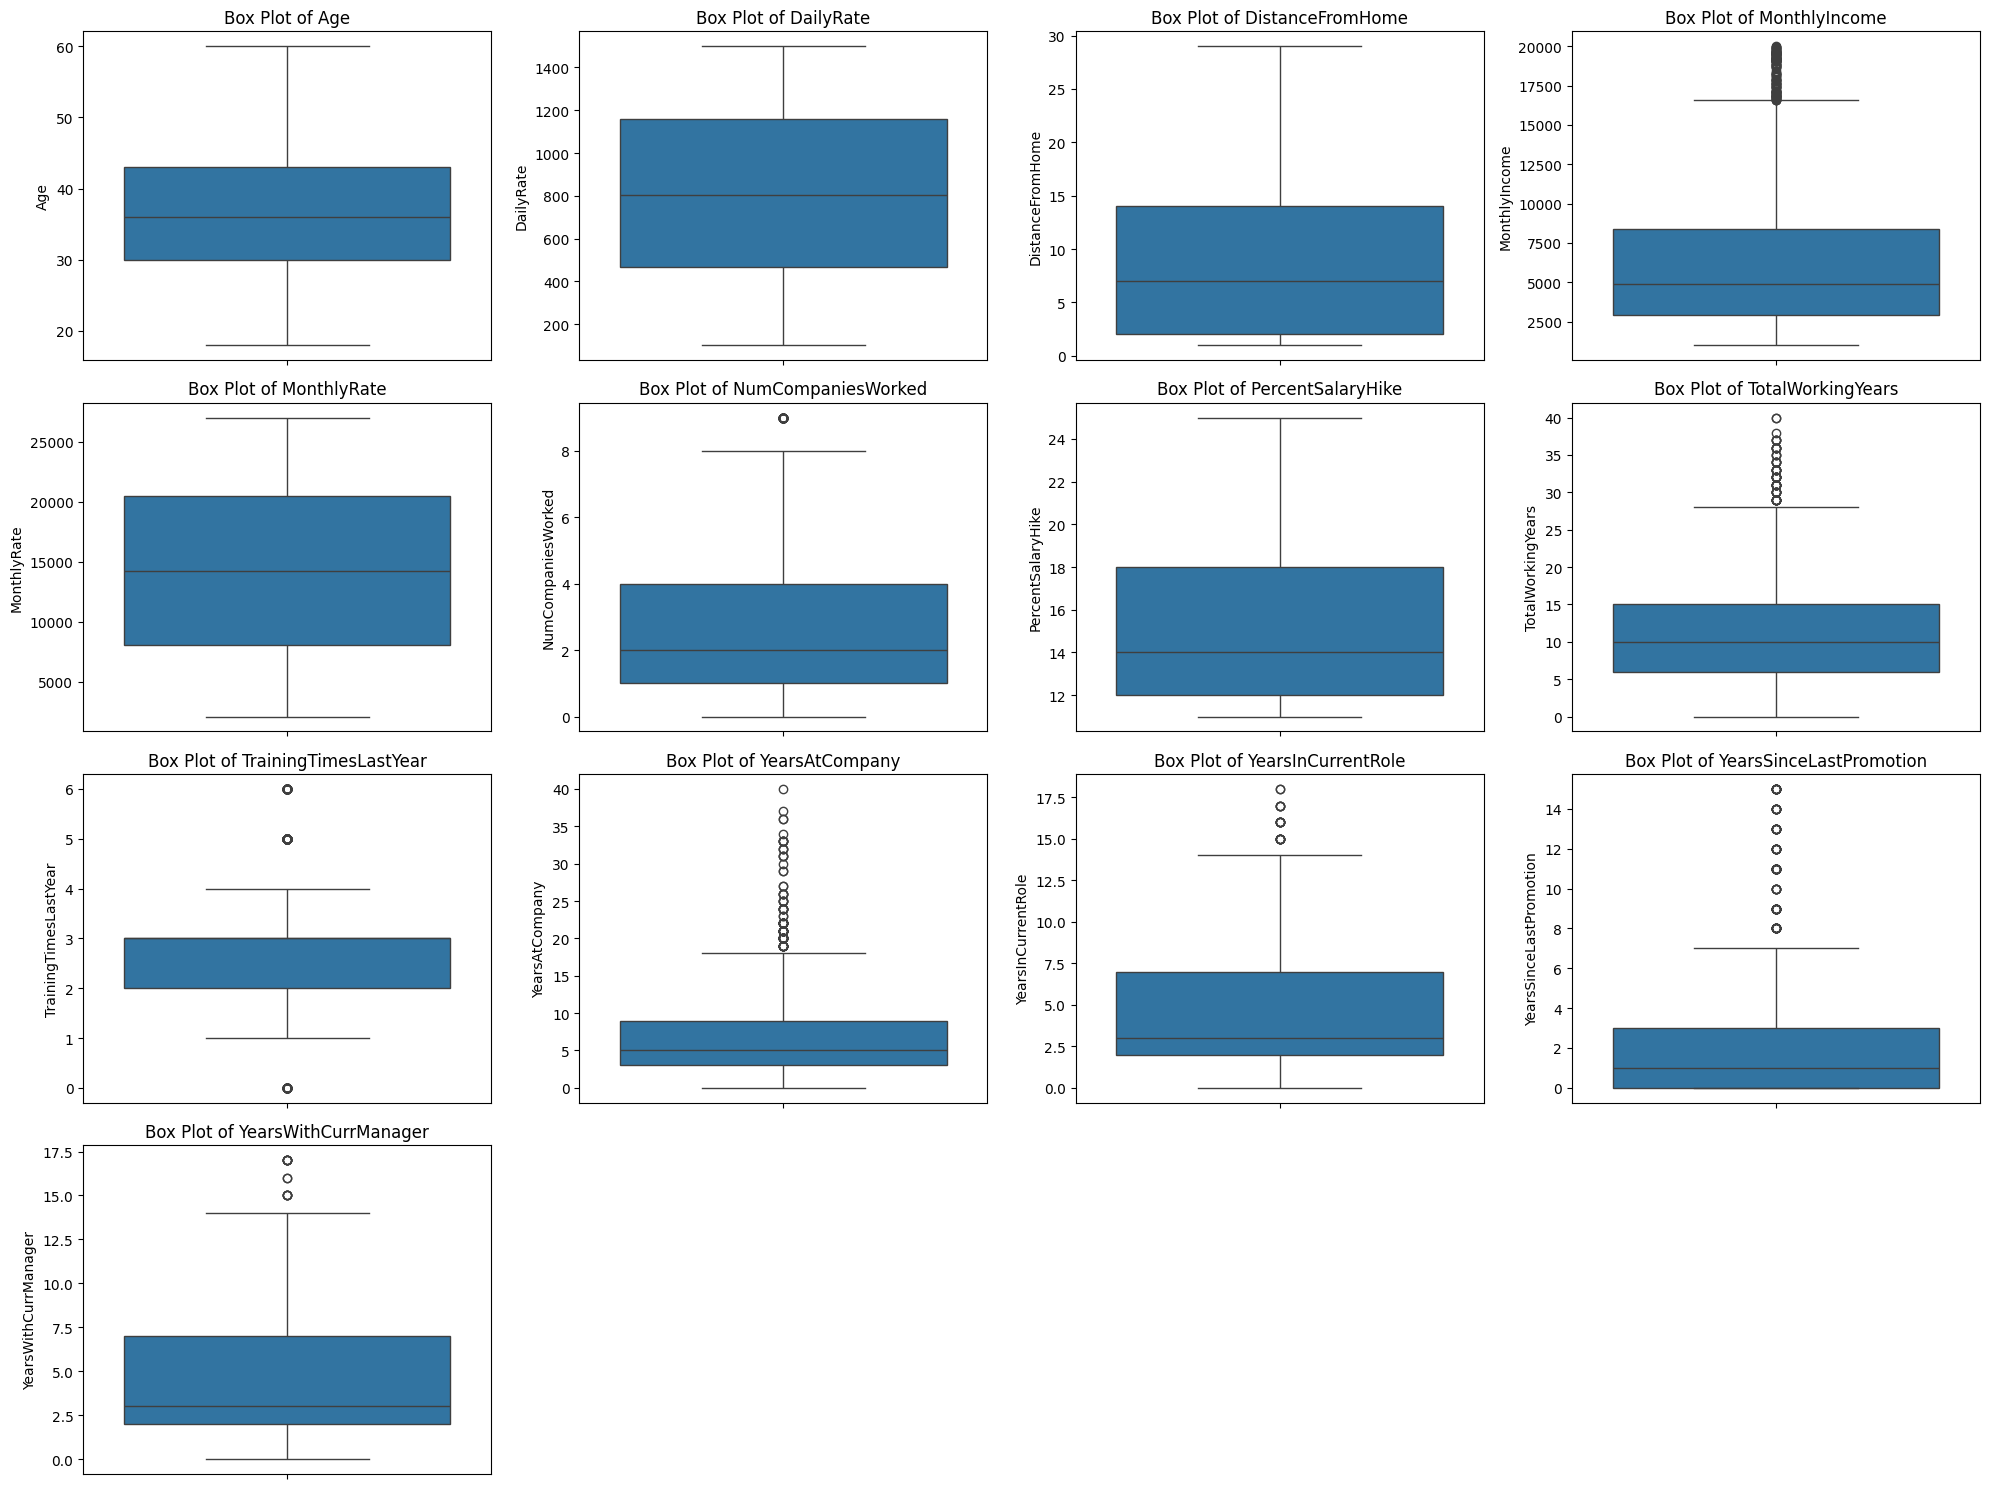

In [ ]:
# Columns to check for outliers
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
                     'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                     'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']



# Box plots for specific columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()




we can clearly notice that the presence  of outliers increases in terms of years columns and monthly income

REMARKS:

1. **Box Plot of TotalWorkingYears:**
There are several outliers above 35 total working years. This could indicate a few employees with exceptionally long careers compared to the majority of the workforce.
2. **Box Plot of TrainingTimesLastYear:**
There are outliers at 0 and 6 training times last year. This suggests that while most employees have a moderate number of training sessions, a few have had very few or many training sessions.

3. **Box Plot of YearsAtCompany:**
There are numerous outliers for employees who have been at the company for more than 20 years. This indicates that while most employees have been with the company for a shorter period, a few have had exceptionally long tenures.

4. **Box Plot of YearsInCurrentRole:**
There are several outliers above 15 years in the current role, suggesting that most employees do not stay in the same role for such a long time, but a few do.

5. **Box Plot of YearsSinceLastPromotion:**
Outliers are present for employees who have not been promoted for over 10 years. This indicates that while most employees receive promotions within a few years, some do not get promoted for a much longer time.

EXPLANATION:

- **Years at Company, Years in Current Role, and Years Since Last Promotion:**
These columns have notable outliers because there is a wide range of tenures and career progression rates among employees. Some employees might have stayed with the company or in their roles for exceptionally long periods, which is less common and thus appears as outliers.

- **Total Working Years:** This column has outliers due to employees who have had very long overall careers. This could be due to older employees nearing retirement who have accumulated many years of work experience.

- **Monthly Income:** Although not explicitly shown in the provided box plots, monthly income could have outliers due to high-level executives or very experienced employees earning significantly more than the average employee.


Now let's dive into EDA exploratory we will perform deep analysis  to get more insights

# EDA EXPLORATORY:

To inderstand more the patterns within the data we must see the variation of each column and between each two columns

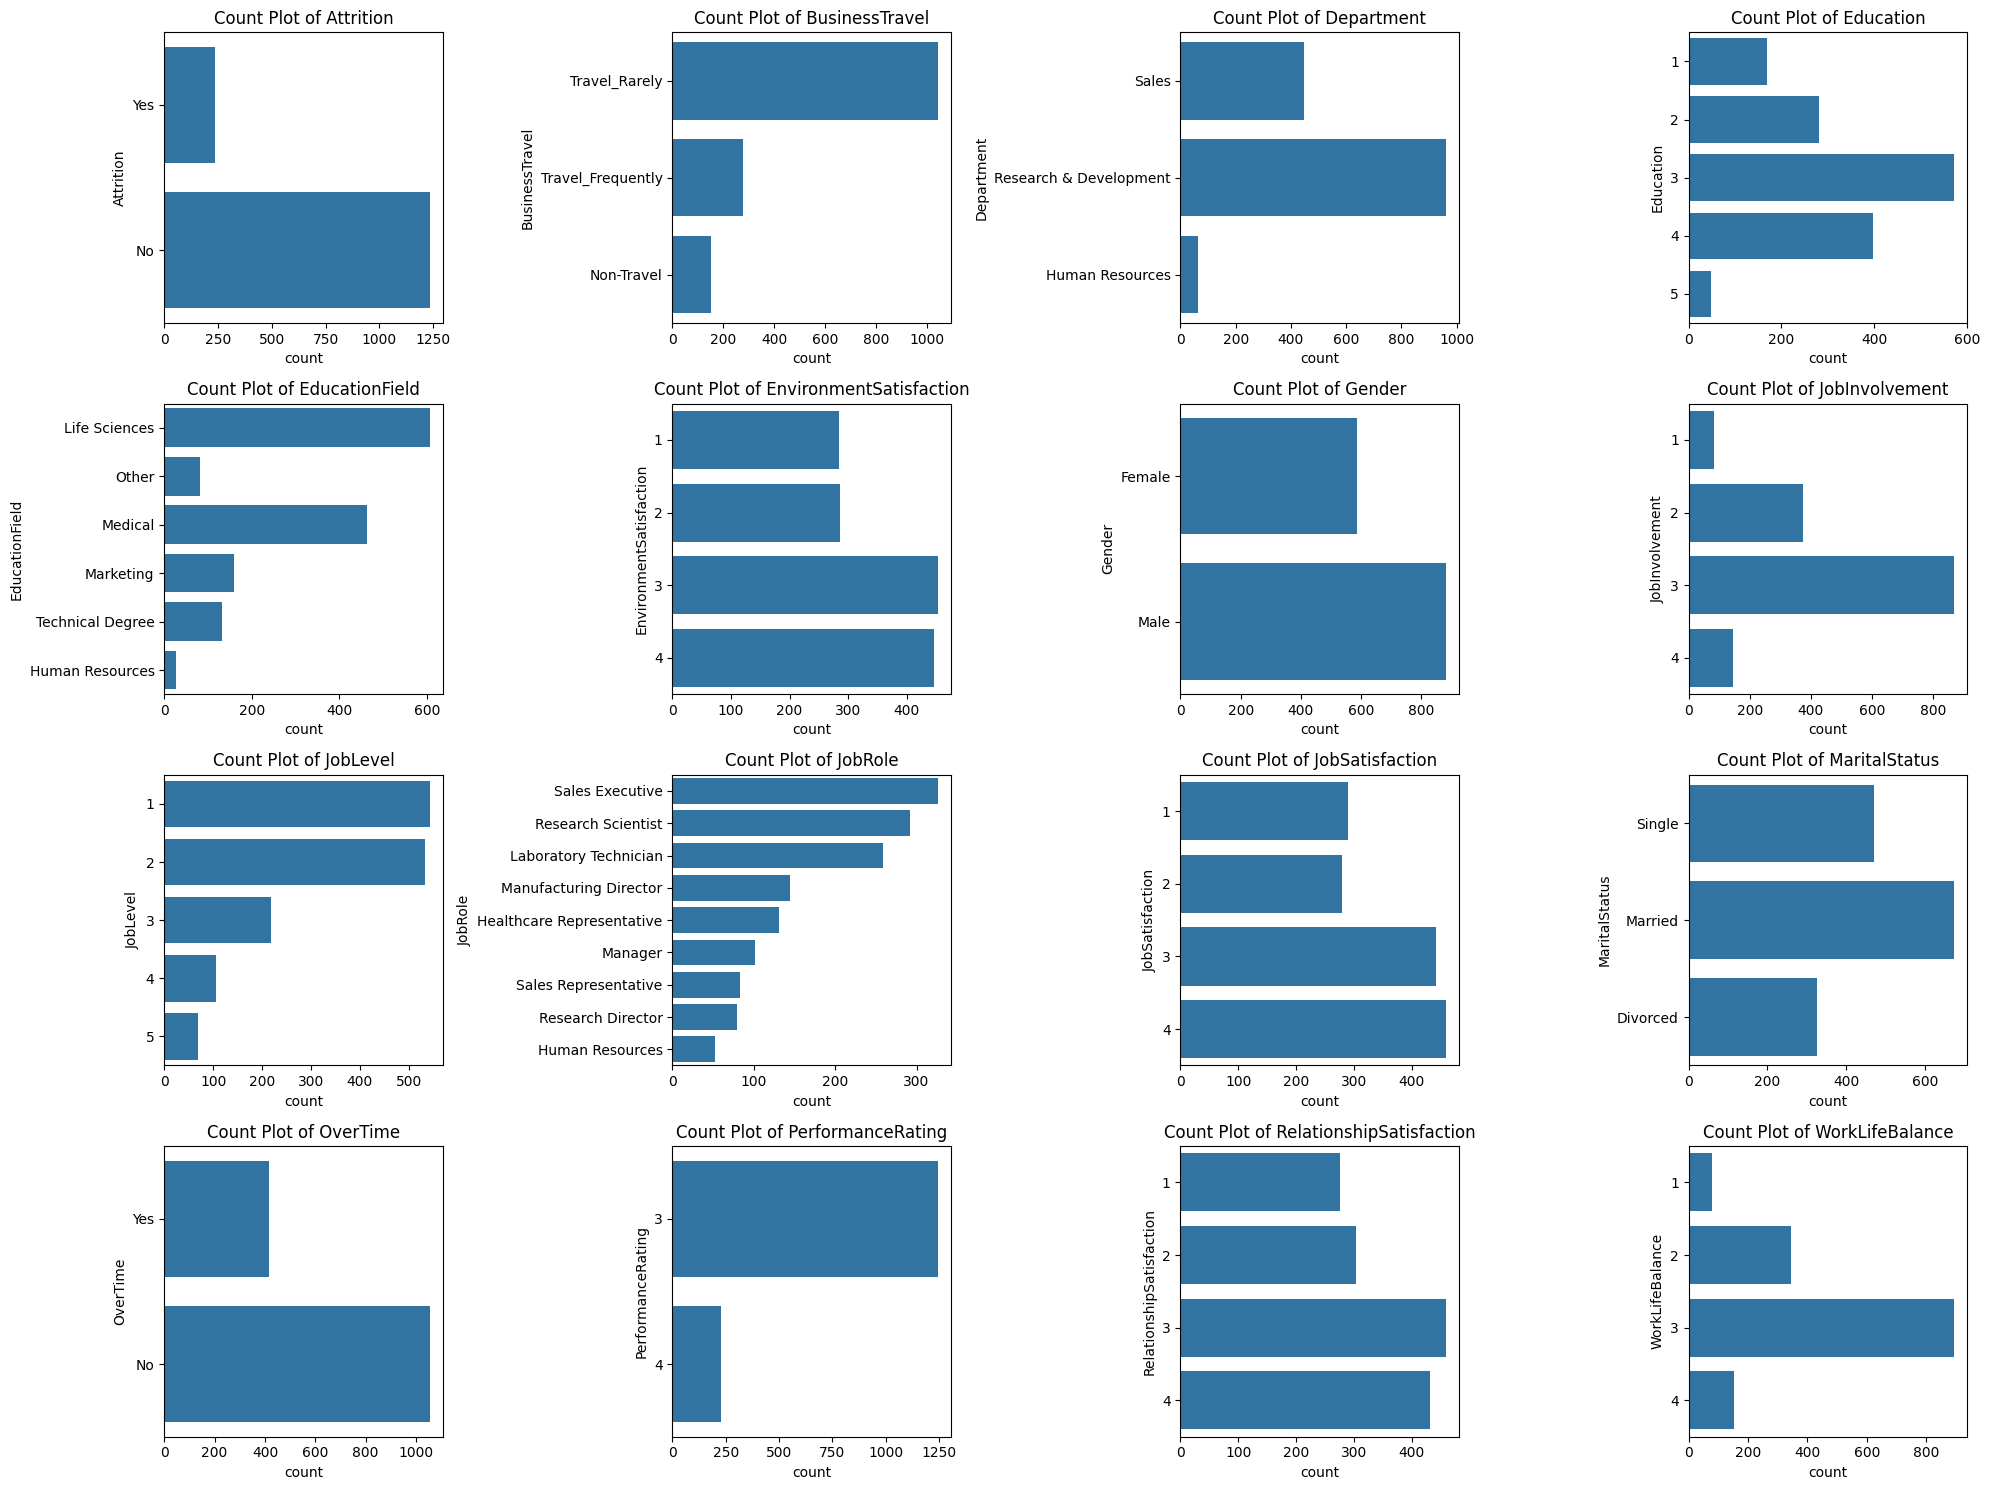

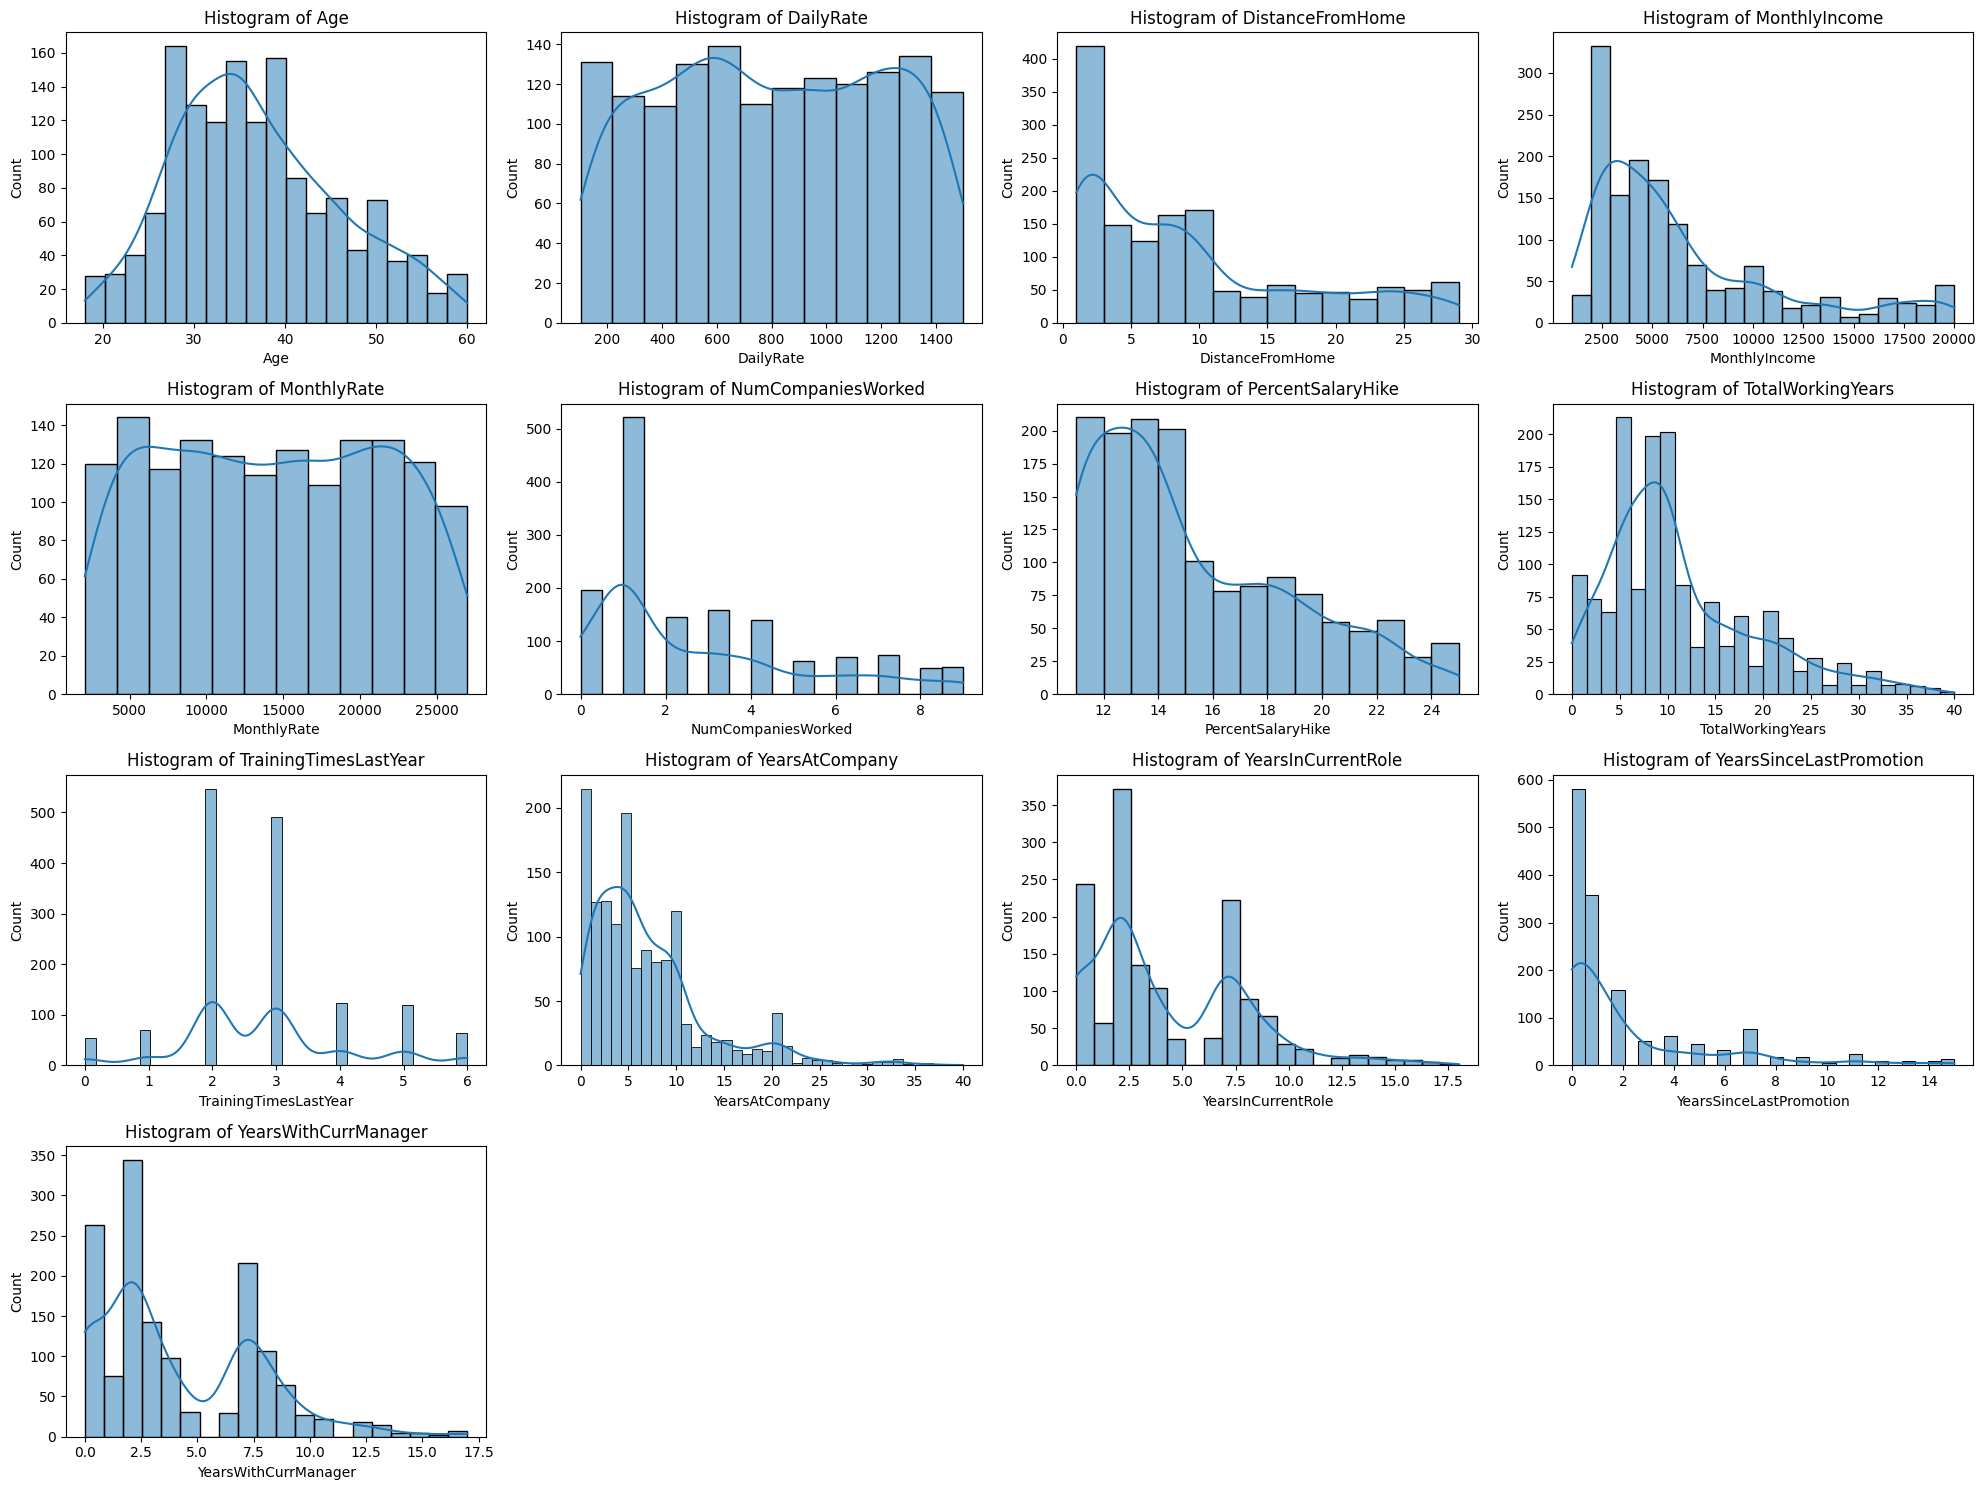

In [ ]:
# Univariate Analysis
categorical_columns = ['Attrition', 'BusinessTravel', 'Department', 'Education',
                       'EducationField', 'EnvironmentSatisfaction', 'Gender',
                       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
                       'MaritalStatus', 'OverTime', 'PerformanceRating',
                       'RelationshipSatisfaction', 'WorkLifeBalance']

numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome',
                     'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
                     'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                     'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Plot categorical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df[column])
    plt.title(f'Count Plot of {column}')
plt.tight_layout()
plt.show()

# Plot numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()






Based on these visulizations we can exctract useful information:
- The number of employees remaining in the company is approximately 1,250, compared to 250 employees who left the company which means that the data is unbalanced with regard to the “yes” and “no” labels.
- The majority of employees are specialized on life sciences around 600 employees
- Around 800 employes that are satisfied about thier work environment vs 600 are not.
- More than 600 employees are married
- More than 300 employees earn $2,500 from their work.
- About 400 employees live close to thier job.


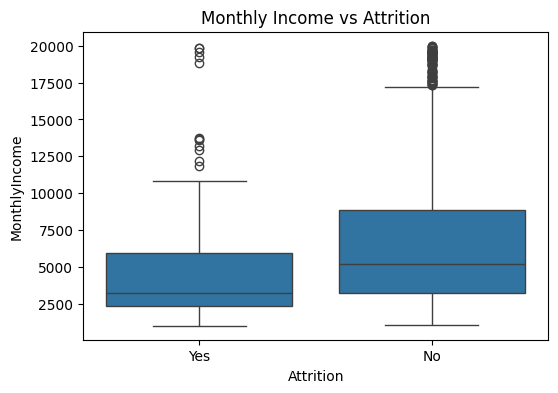

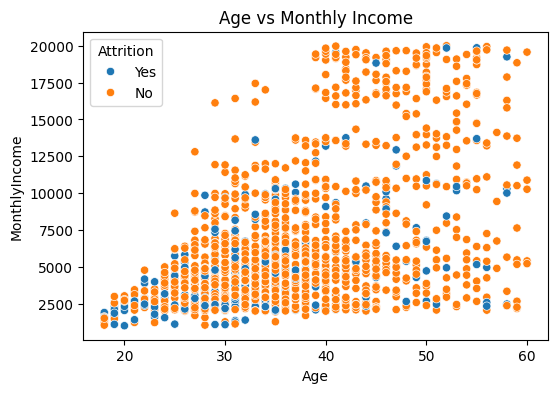

In [ ]:
# Bivariate Analysis

# Categorical vs Numerical
plt.figure(figsize=(6, 4))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Monthly Income vs Attrition')
plt.show()

# Numerical vs Numerical
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Age', y='MonthlyIncome', hue='Attrition', data=df)
plt.title('Age vs Monthly Income')
plt.show()

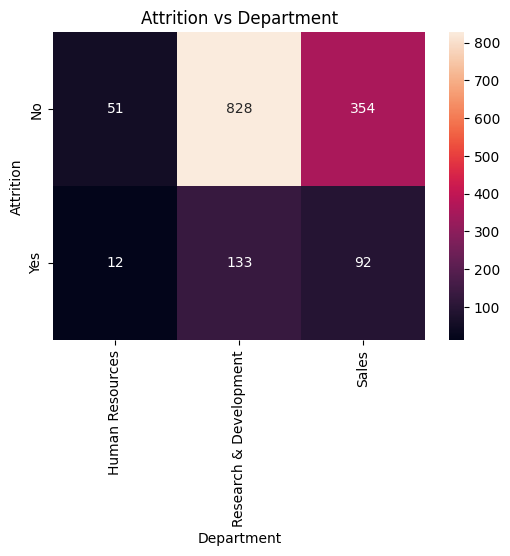

In [ ]:
# Categorical vs Categorical
plt.figure(figsize=(6, 4))
sns.heatmap(pd.crosstab(df['Attrition'], df['Department']), annot=True, fmt='d')
plt.title('Attrition vs Department')
plt.show()

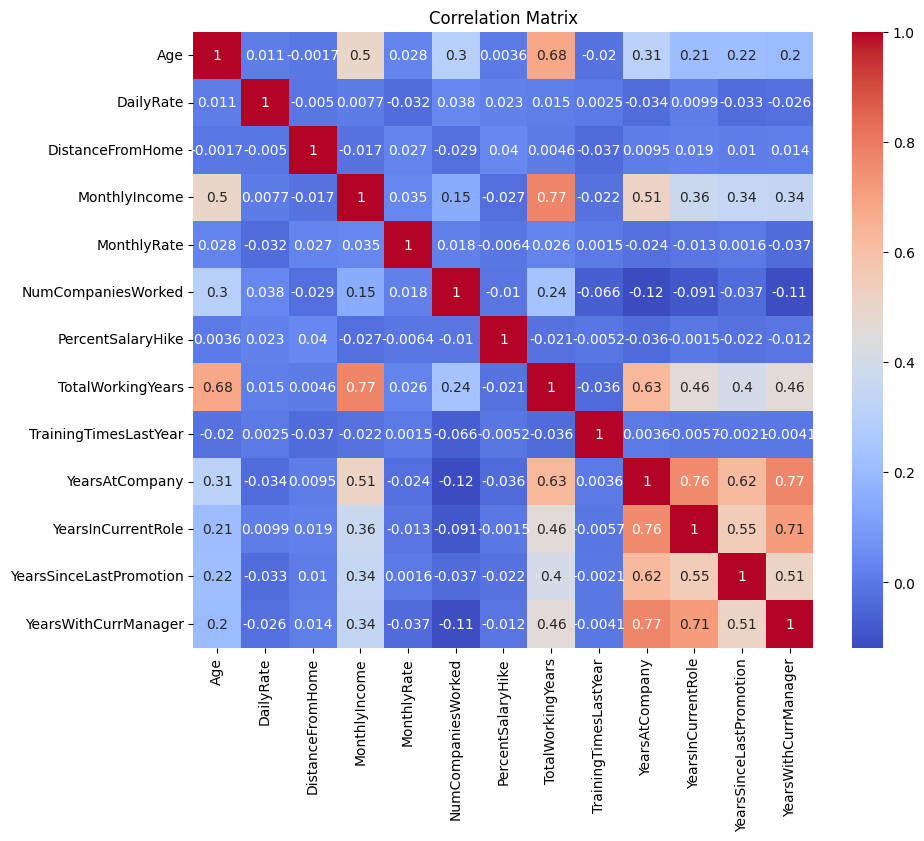

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()





There is high correlation between four Varibles such us YearsAtCompany, YearsInCurrentRole, years With the current manager and yearsSinceLastPromotion.

**Explanation:** Sometimes we find an employee that has the same years in each column variable


In [ ]:
# Summarizing Findings
attrition_rate = df['Attrition'].value_counts(normalize=True)
print(f"Attrition Rate: {attrition_rate}")

Attrition Rate: Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


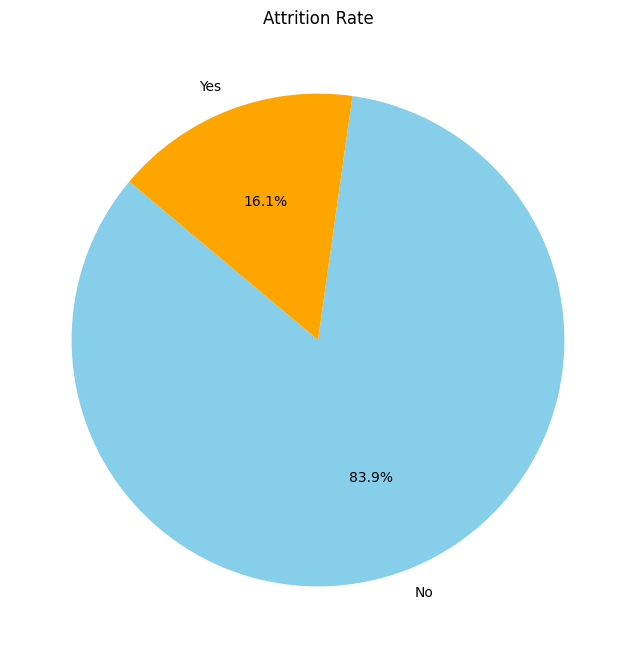

In [ ]:


# Calculate attrition rate
attrition_rate = df['Attrition'].value_counts(normalize=True)

# Convert to DataFrame for better handling with seaborn
attrition_df = attrition_rate.reset_index()
attrition_df.columns = ['Attrition', 'Proportion']

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(attrition_df['Proportion'], labels=attrition_df['Attrition'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange'])
plt.title('Attrition Rate')
plt.show()


83% of employees stay in the company vs 16.12% left.

In [ ]:
# Feature Engineering (optional)
df['YearsWithoutPromotion'] = df['YearsAtCompany'] - df['YearsSinceLastPromotion']

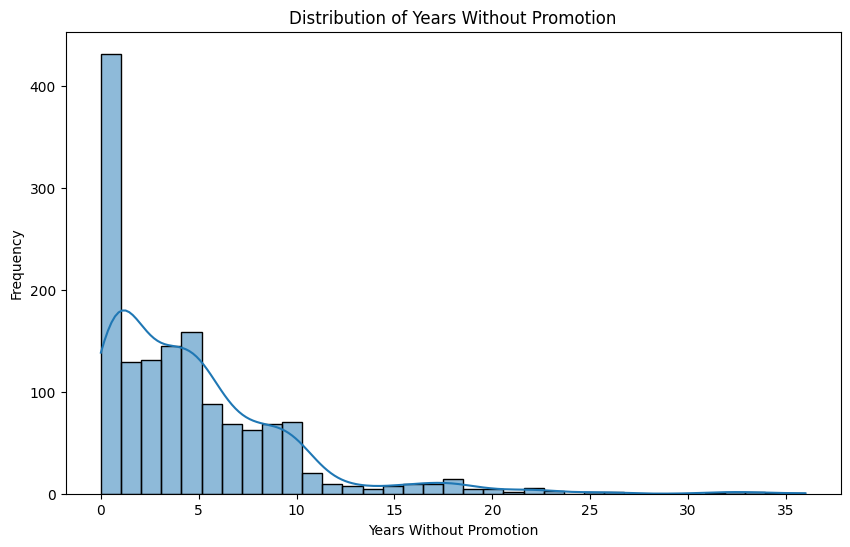

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of YearsWithoutPromotion
plt.figure(figsize=(10, 6))
sns.histplot(df['YearsWithoutPromotion'], kde=True)
plt.title('Distribution of Years Without Promotion')
plt.xlabel('Years Without Promotion')
plt.ylabel('Frequency')
plt.show()


Let's encode the target variable Attrition yes -1 No -0

In [5]:
# Convert Attrition to a numeric binary variable
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

Let's see the relationship between the target variable 'Atrrition' with other variables

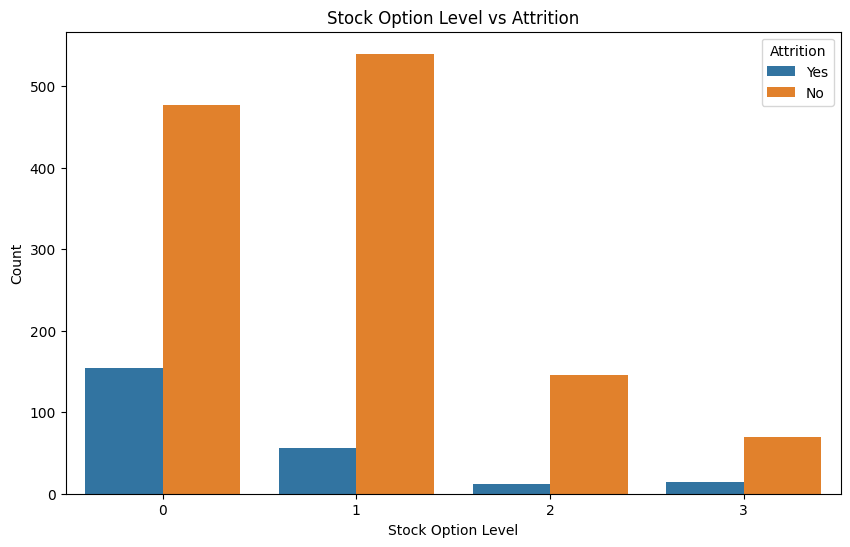

In [ ]:
# Box plot to visualize the relationship between StockOptionLevel and MonthlyIncome
plt.figure(figsize=(10, 6))
sns.countplot(x='StockOptionLevel', hue='Attrition', data=df)
plt.title('Stock Option Level vs Attrition')
plt.xlabel('Stock Option Level')
plt.ylabel('Count')
plt.show()


The majority that left the company use level 0 of stock option

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

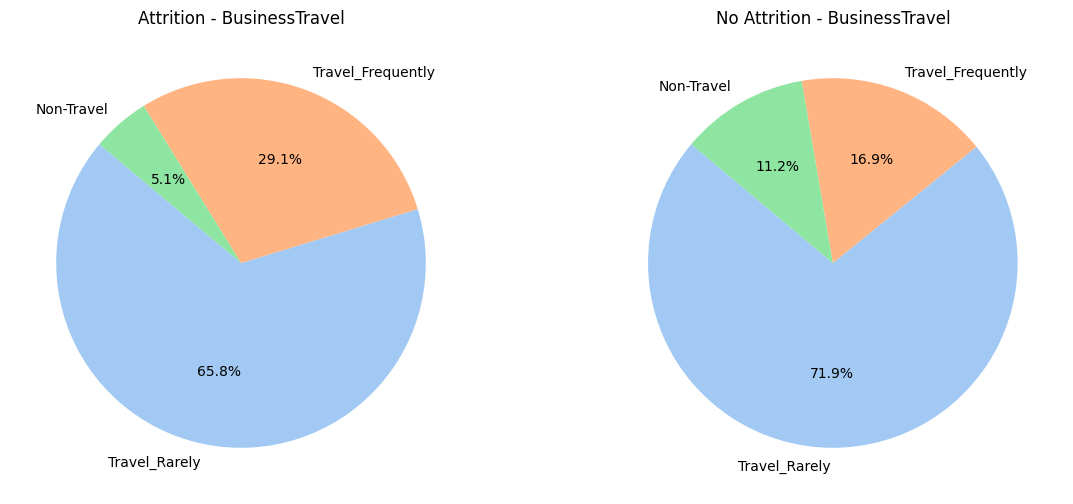

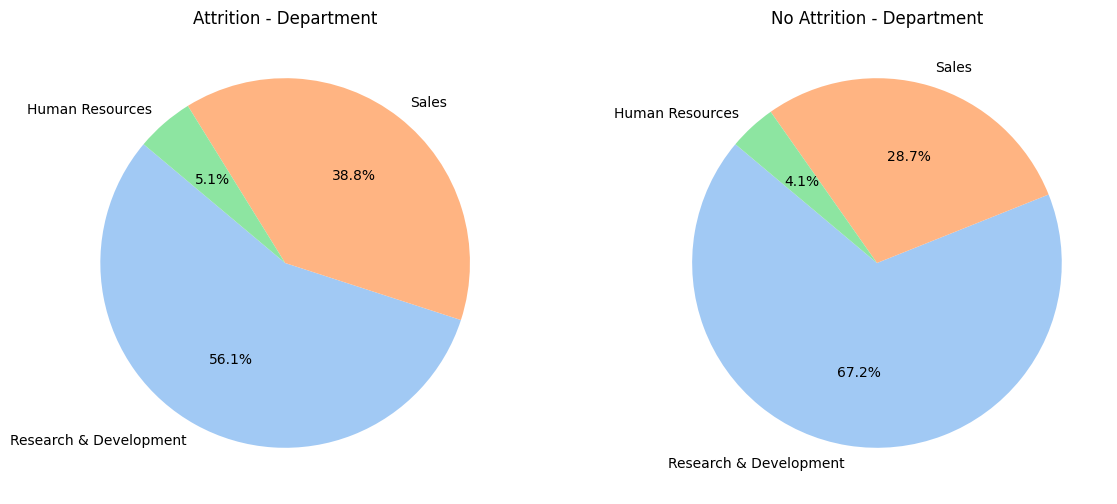

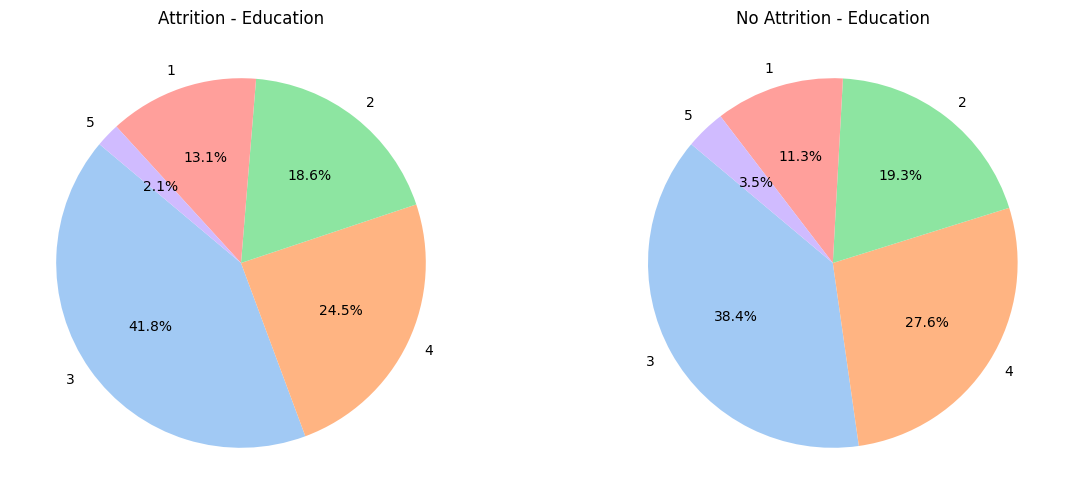

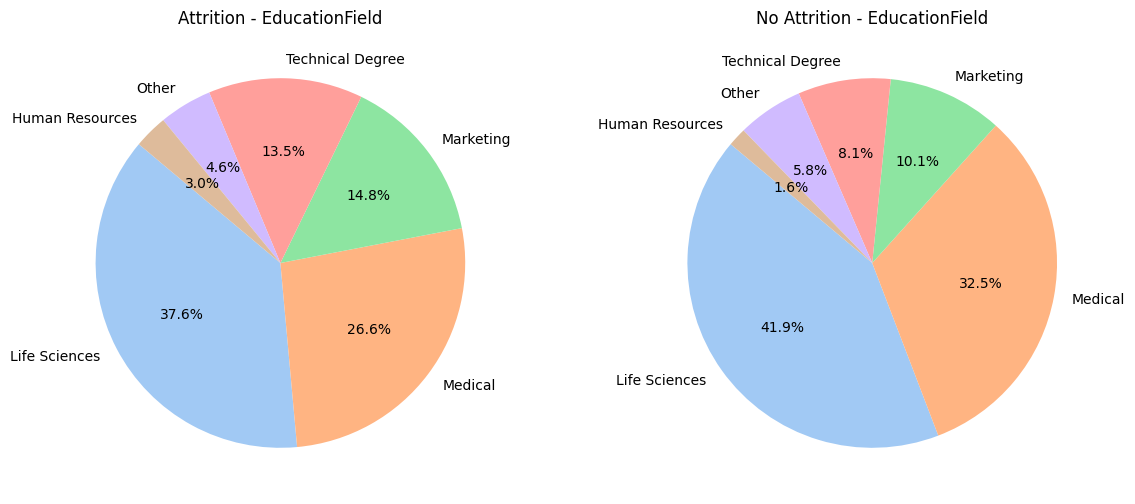

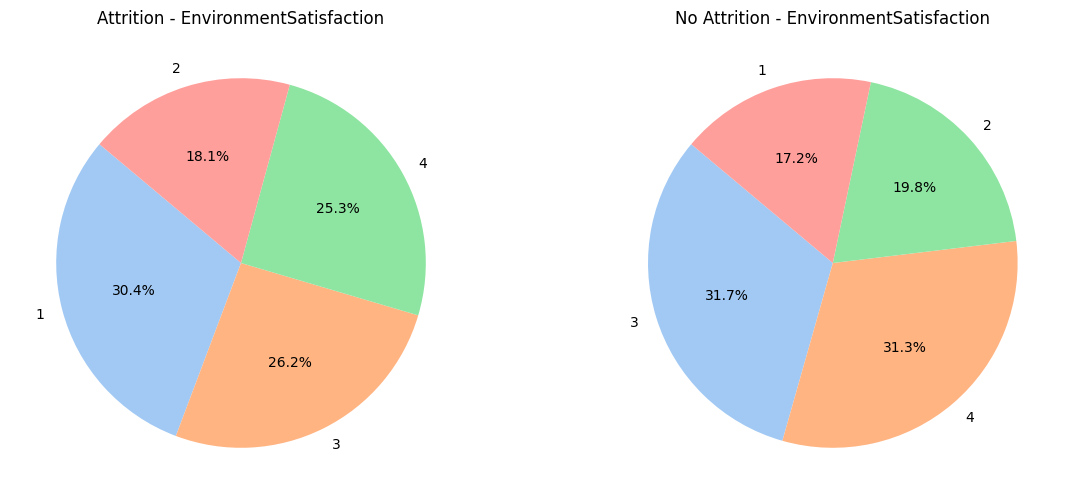

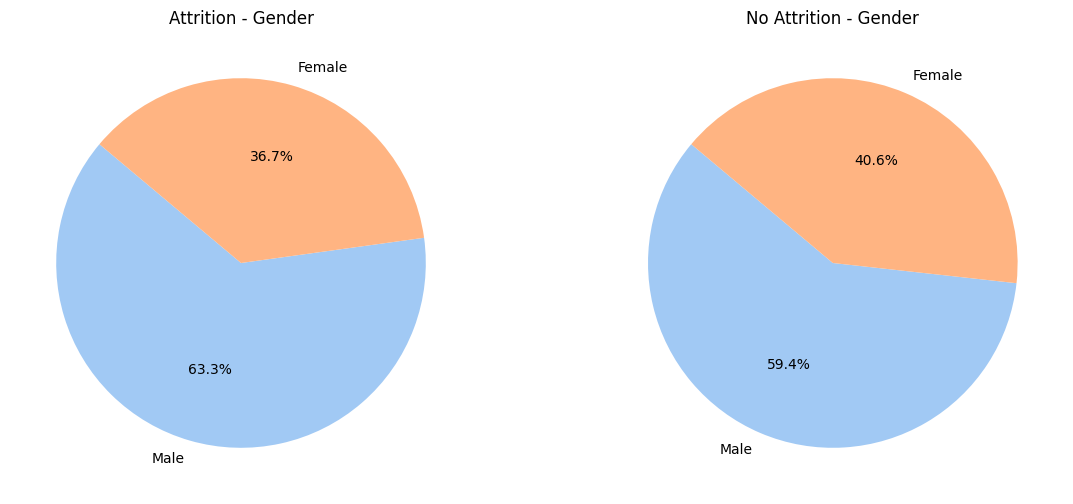

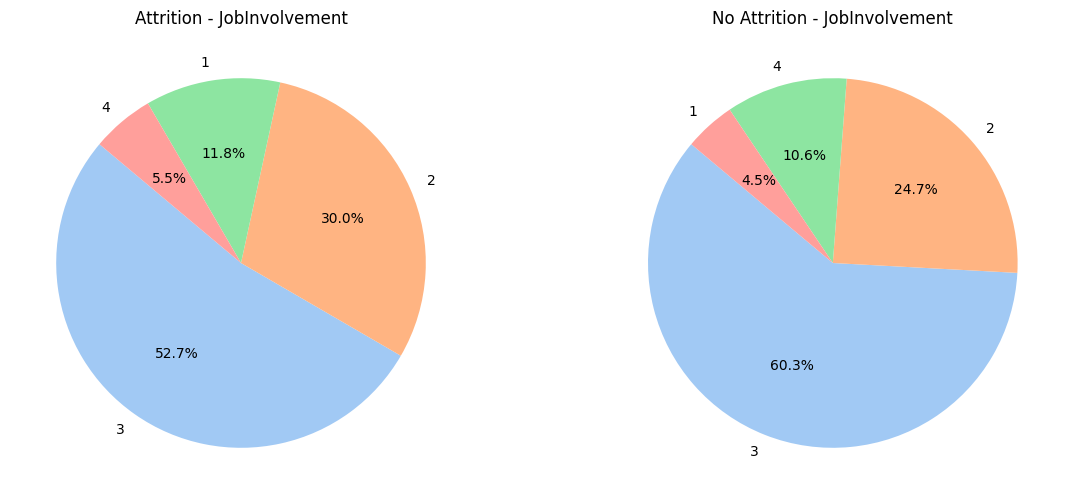

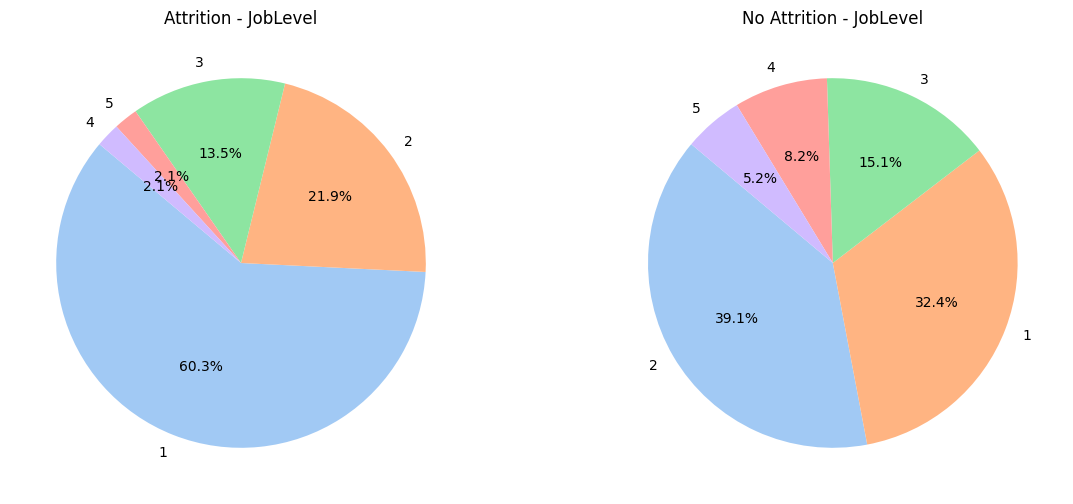

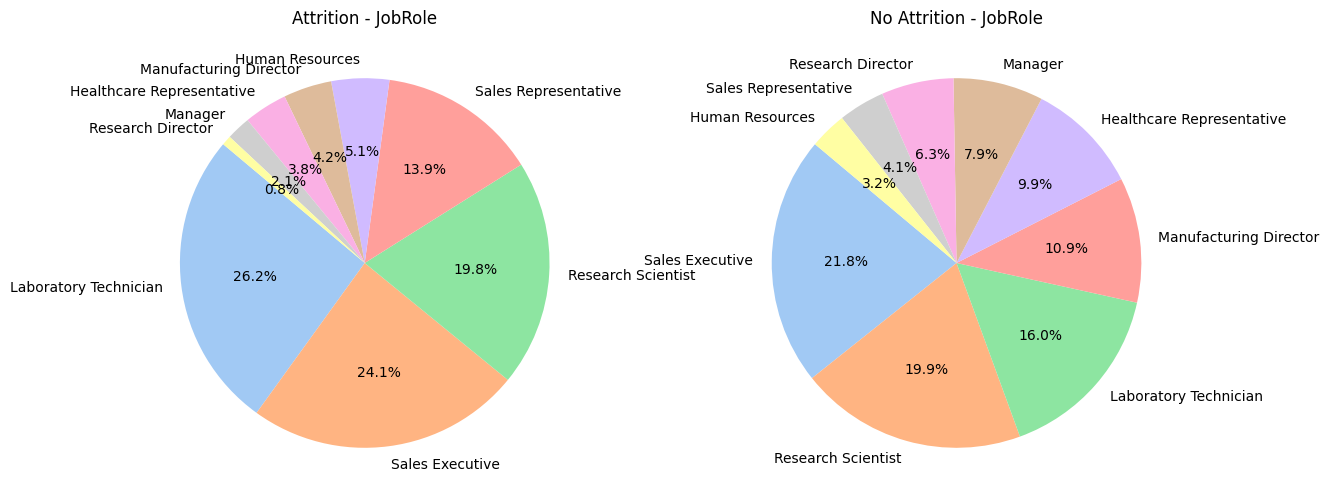

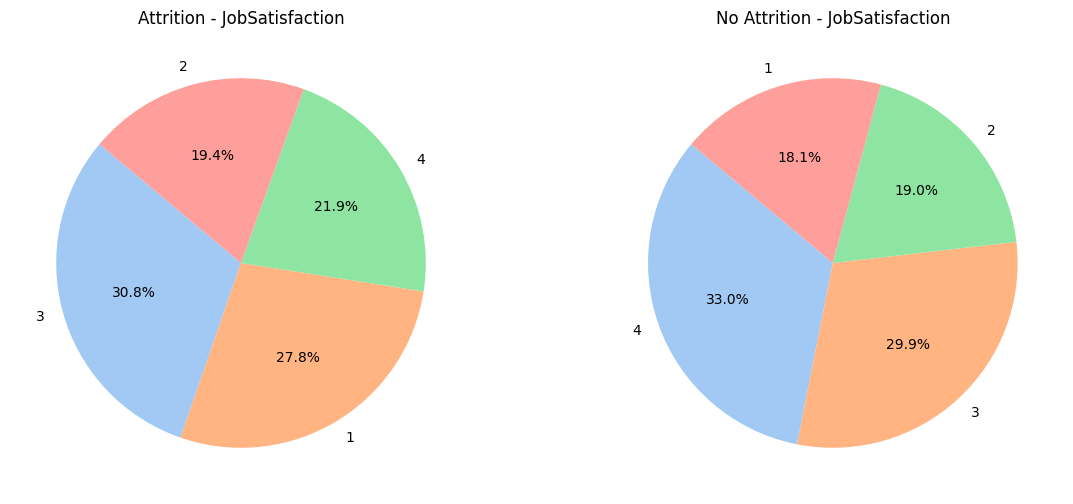

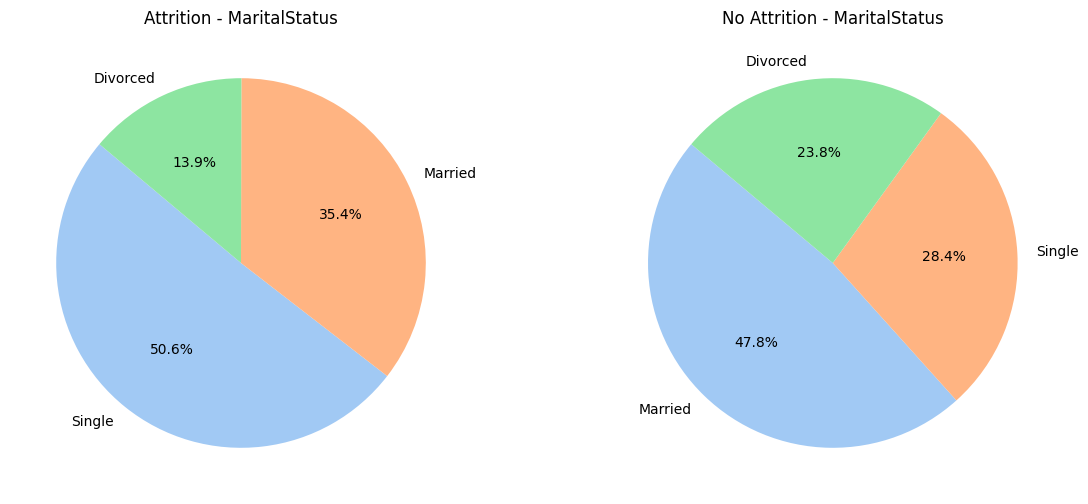

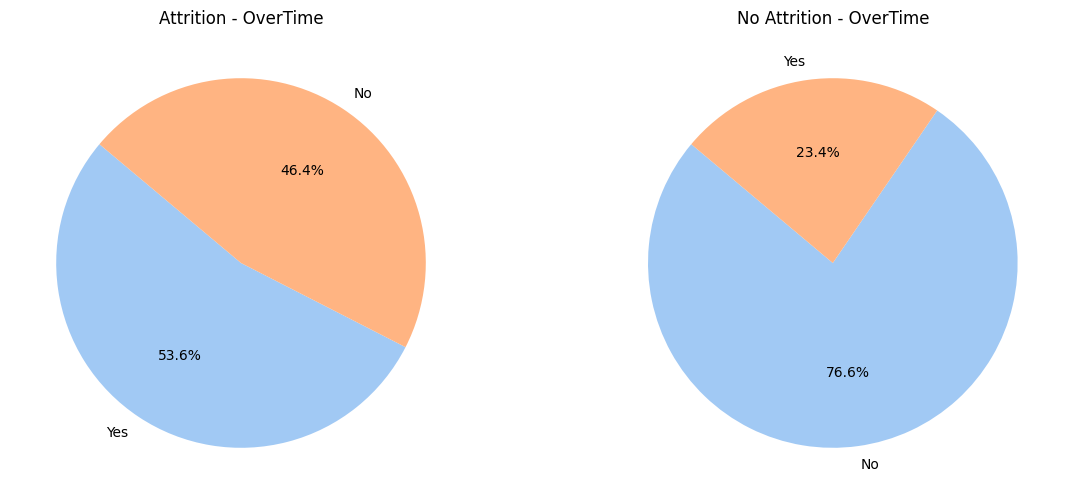

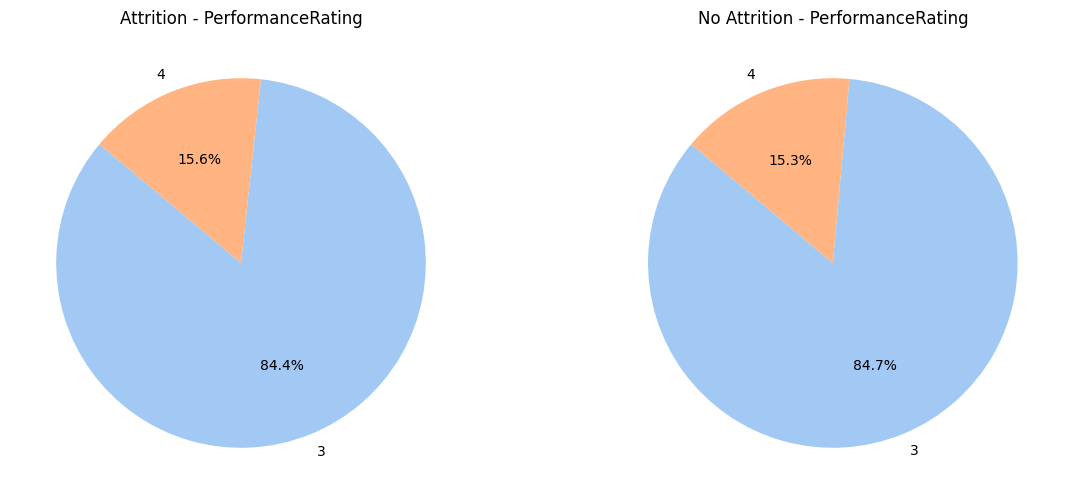

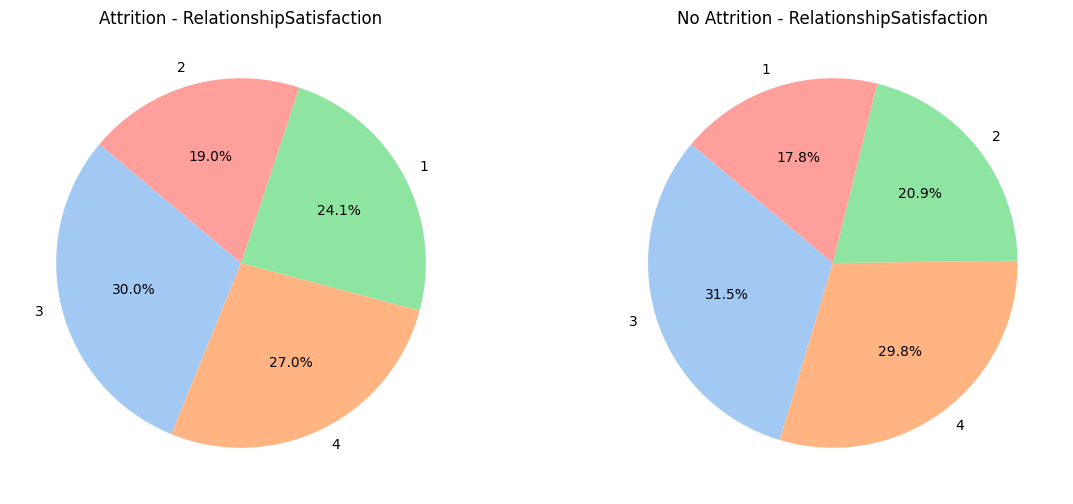

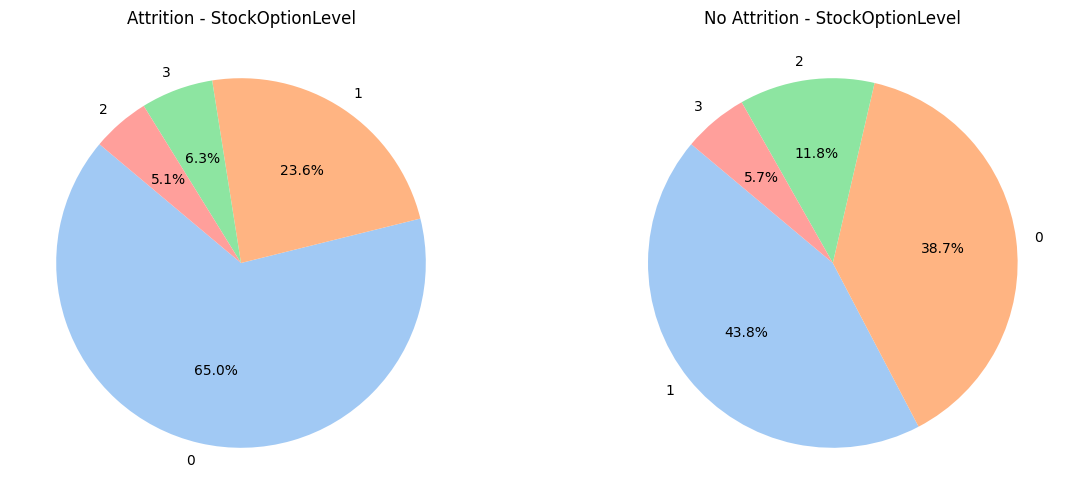

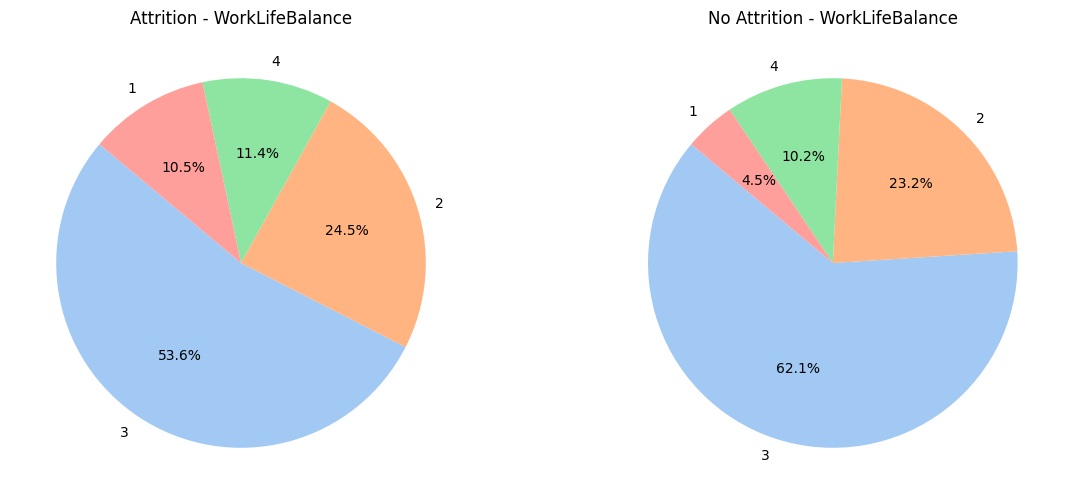

In [ ]:
# Function to create pie chart for a categorical variable
def plot_pie_chart(data, category):
    attrition_data = data[data['Attrition'] == 1][category].value_counts(normalize=True)
    no_attrition_data = data[data['Attrition'] == 0][category].value_counts(normalize=True)

    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Pie chart for Attrition
    ax[0].pie(attrition_data, labels=attrition_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax[0].set_title(f'Attrition - {category}')

    # Pie chart for No Attrition
    ax[1].pie(no_attrition_data, labels=no_attrition_data.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
    ax[1].set_title(f'No Attrition - {category}')

    plt.show()

# Categorical Variables
categorical_vars = ['BusinessTravel', 'Department', 'Education', 'EducationField',
                    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
                    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
                    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                    'WorkLifeBalance']

# Plot pie charts for each categorical variable
for var in categorical_vars:
    plot_pie_chart(df, var)


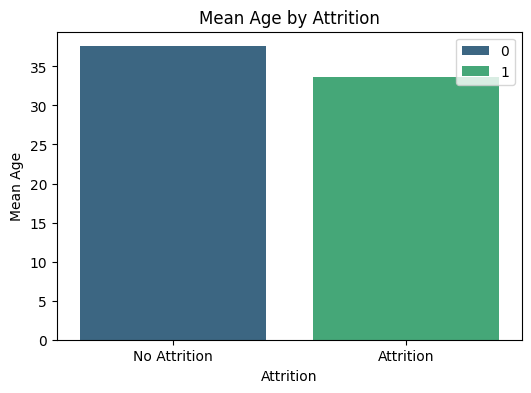

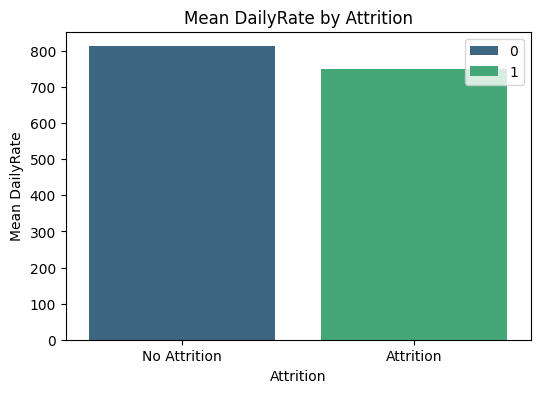

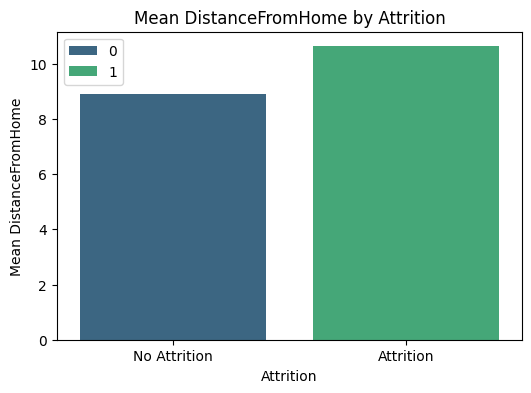

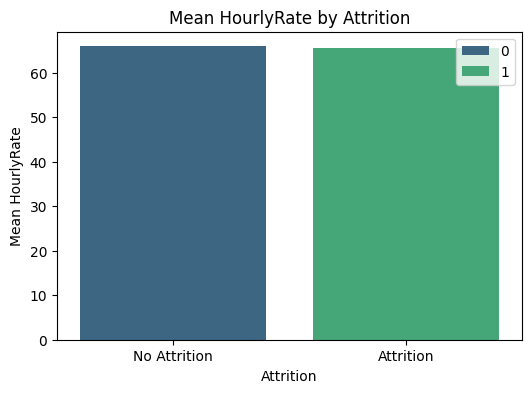

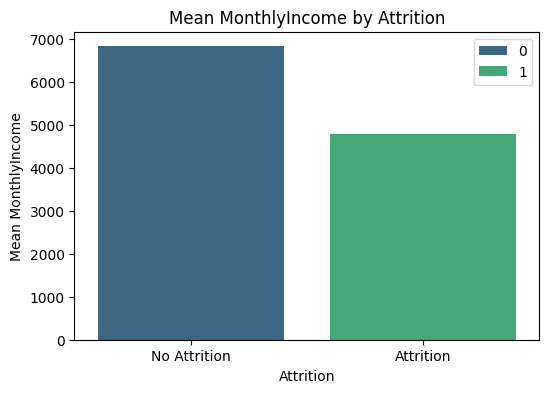

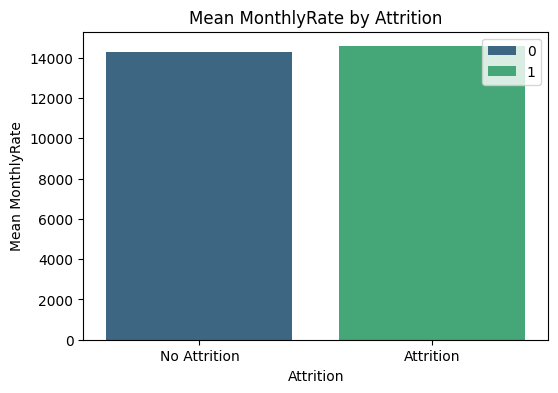

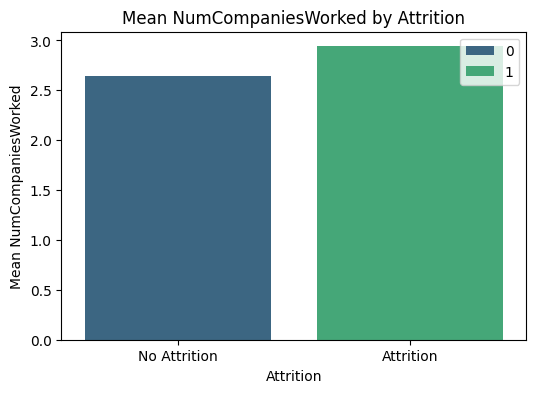

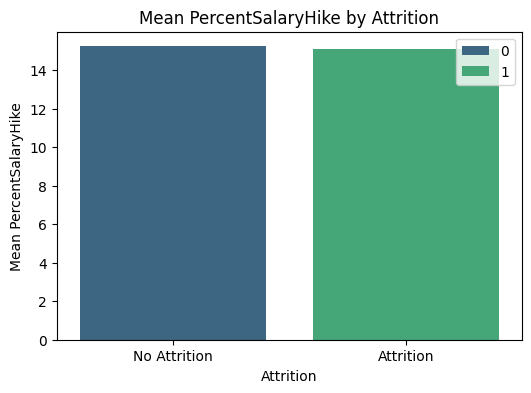

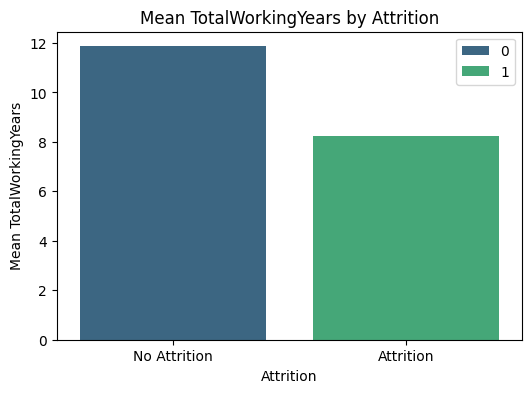

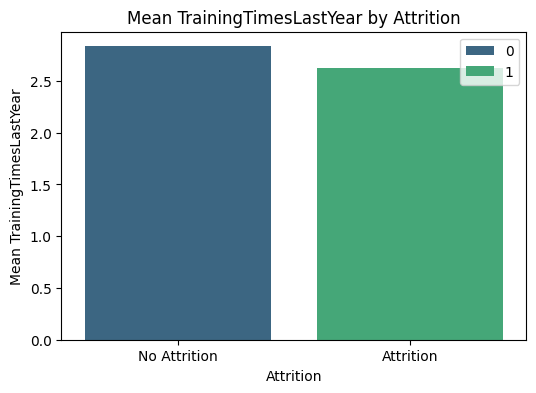

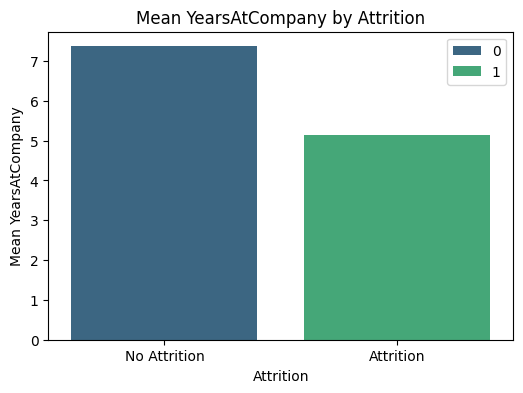

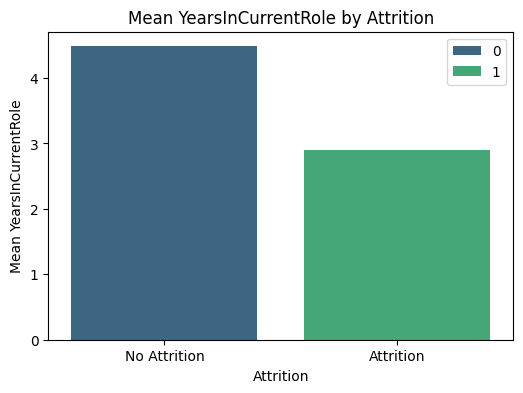

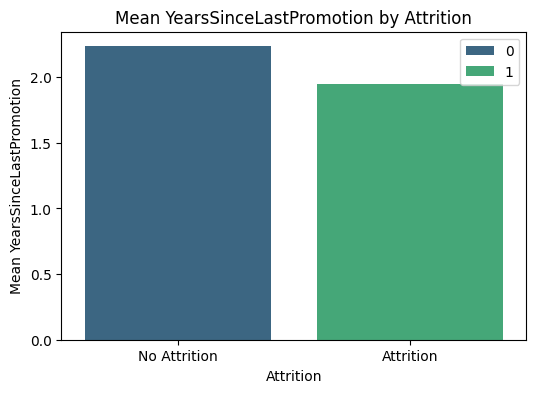

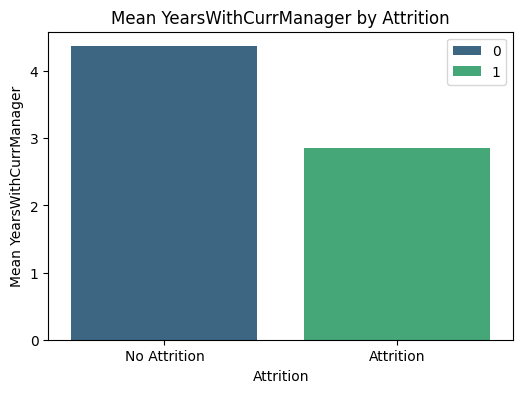

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create bar chart for a numerical variable
def plot_bar_chart(data, numerical_var):
    attrition_means = data.groupby('Attrition')[numerical_var].mean()

    plt.figure(figsize=(6, 4))
    sns.barplot(x=attrition_means.index, y=attrition_means.values, hue=attrition_means.index, palette='viridis', dodge=False)
    plt.title(f'Mean {numerical_var} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(f'Mean {numerical_var}')
    plt.xticks(ticks=[0, 1], labels=['No Attrition', 'Attrition'])
    plt.legend(title=None)
    plt.show()

# Numerical Variables
numerical_vars = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
                  'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
                  'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                  'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Plot bar charts for each numerical variable
for var in numerical_vars:
    plot_bar_chart(df, var)




# Feature exctraction

After these deep analysis we can decide which variables to keep and which to remove.

The categorical variables to keep are:
- buisness travel
- Job Role
- Marital Status
- OverTime


The numerical vaiables to keep are:
- Distance from Home
- JobInvolvement
- Environment satisfaction
- Monthly Income
- Job Satisfaction
- Job Level
- Number of companies worked
- TotalWorkingYears
- TrainingTimesLastYear
- Stock Option Level
- YearsAtCompany
- Stock Option Level
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

# Encoding Categorical Variables

In [6]:
data=df

To process the data properly we need to drop the non useful columns and keep the choosed ones

In [ ]:
categorical_vars = df.select_dtypes(include=['object']).columns

In [ ]:
categorical_vars

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [ ]:
categorical_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# Loop through each categorical variable and print its unique categories
for var in categorical_vars:
    unique_categories = df[var].unique()
    print(f"Categories for {var}: {unique_categories}")


Categories for BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Categories for Department: ['Sales' 'Research & Development' 'Human Resources']
Categories for EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Categories for Gender: ['Female' 'Male']
Categories for JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Categories for MaritalStatus: ['Single' 'Married' 'Divorced']
Categories for Over18: ['Y']
Categories for OverTime: ['Yes' 'No']


let's encode the categorigal var

In [7]:
# List of columns to keep
categorical_vars_to_keep = ['BusinessTravel', 'JobRole', 'MaritalStatus', 'OverTime']
numerical_vars_to_keep = ['DistanceFromHome', 'JobInvolvement', 'EnvironmentSatisfaction', 'MonthlyIncome',
                          'JobSatisfaction', 'JobLevel', 'NumCompaniesWorked', 'TotalWorkingYears',
                          'TrainingTimesLastYear', 'StockOptionLevel', 'YearsAtCompany', 'YearsInCurrentRole',
                          'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Combine the lists
columns_to_keep = categorical_vars_to_keep + numerical_vars_to_keep + ['Attrition']

# Filter the DataFrame
data = df[columns_to_keep]

# Label Encoding for MaritalStatus
label_enc = LabelEncoder()
data.loc[:, 'MaritalStatus'] = label_enc.fit_transform(data['MaritalStatus'])

# One Hot Encoding for BusinessTravel and JobRole
data = pd.get_dummies(data, columns=['BusinessTravel', 'JobRole'], drop_first=True)

# Binary Encoding for OverTime
binary_enc = ce.BinaryEncoder(cols=['OverTime'], drop_invariant=True)
data = binary_enc.fit_transform(data)







In [8]:
data.head()

,MaritalStatus,OverTime_0,OverTime_1,DistanceFromHome,JobInvolvement,EnvironmentSatisfaction,MonthlyIncome,JobSatisfaction,JobLevel,NumCompaniesWorked,...,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,2,0,1,1,3,2,5993,4,2,8,...,False,True,False,False,False,False,False,False,True,False
1,1,1,0,8,2,3,5130,2,2,1,...,True,False,False,False,False,False,False,True,False,False
2,2,0,1,2,2,4,2090,3,1,6,...,False,True,False,True,False,False,False,False,False,False
3,1,0,1,3,3,4,2909,3,1,1,...,True,False,False,False,False,False,False,True,False,False
4,1,1,0,2,3,1,3468,2,1,9,...,False,True,False,True,False,False,False,False,False,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   MaritalStatus                     1470 non-null   object
 1   OverTime_0                        1470 non-null   int64 
 2   OverTime_1                        1470 non-null   int64 
 3   DistanceFromHome                  1470 non-null   int64 
 4   JobInvolvement                    1470 non-null   int64 
 5   EnvironmentSatisfaction           1470 non-null   int64 
 6   MonthlyIncome                     1470 non-null   int64 
 7   JobSatisfaction                   1470 non-null   int64 
 8   JobLevel                          1470 non-null   int64 
 9   NumCompaniesWorked                1470 non-null   int64 
 10  TotalWorkingYears                 1470 non-null   int64 
 11  TrainingTimesLastYear             1470 non-null   int64 
 12  StockOptionLevel    

In [10]:
# Convert any boolean columns to integers
data = data.astype(int)

In [ ]:
data

,MaritalStatus,OverTime_0,OverTime_1,DistanceFromHome,JobInvolvement,EnvironmentSatisfaction,MonthlyIncome,JobSatisfaction,JobLevel,NumCompaniesWorked,...,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,2,0,1,1,3,2,5993,4,2,8,...,0,1,0,0,0,0,0,0,1,0
1,1,1,0,8,2,3,5130,2,2,1,...,1,0,0,0,0,0,0,1,0,0
2,2,0,1,2,2,4,2090,3,1,6,...,0,1,0,1,0,0,0,0,0,0
3,1,0,1,3,3,4,2909,3,1,1,...,1,0,0,0,0,0,0,1,0,0
4,1,1,0,2,3,1,3468,2,1,9,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,0,23,4,3,2571,4,2,4,...,1,0,0,1,0,0,0,0,0,0
1466,1,1,0,6,2,4,9991,1,3,4,...,0,1,0,0,0,0,0,0,0,0
1467,1,0,1,4,4,2,6142,2,2,1,...,0,1,0,0,0,1,0,0,0,0
1468,1,1,0,2,2,4,5390,2,2,2,...,1,0,0,0,0,0,0,0,1,0


# Feature scaling

In [11]:
numerical_vars = data.select_dtypes(include=['int64']).columns

In [12]:
numerical_vars

Index(['MaritalStatus', 'OverTime_0', 'OverTime_1', 'DistanceFromHome',
       'JobInvolvement', 'EnvironmentSatisfaction', 'MonthlyIncome',
       'JobSatisfaction', 'JobLevel', 'NumCompaniesWorked',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'StockOptionLevel',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative'],
      dtype='object')

In [13]:
# Save and remove the target variable
y = data['Attrition']
data = data.drop('Attrition', axis=1)

# List of numerical features
numerical_vars = data.select_dtypes(include=['int64', 'float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical features
data[numerical_vars] = scaler.fit_transform(data[numerical_vars])

# Define target variable and features
X = data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing labels shape: {y_test.shape}")


Training set shape: (1176, 27)
Testing set shape: (294, 27)
Training labels shape: (1176,)
Testing labels shape: (294,)


In [15]:
data.head()


,MaritalStatus,OverTime_0,OverTime_1,DistanceFromHome,JobInvolvement,EnvironmentSatisfaction,MonthlyIncome,JobSatisfaction,JobLevel,NumCompaniesWorked,...,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,1.236820,-1.591746,1.591746,-1.010909,0.379672,-0.660531,-0.108350,1.153254,-0.057788,2.125136,...,-0.481859,0.639841,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625
1,-0.133282,0.628241,-0.628241,-0.147150,-1.026167,0.254625,-0.291719,-0.660853,-0.057788,-0.678049,...,2.075297,-1.562889,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625
2,1.236820,-1.591746,1.591746,-0.887515,-1.026167,1.169781,-0.937654,0.246200,-0.961486,1.324226,...,-0.481859,0.639841,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625
3,-0.133282,-1.591746,1.591746,-0.764121,0.379672,1.169781,-0.763634,0.246200,-0.961486,-0.678049,...,2.075297,-1.562889,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625
4,-0.133282,0.628241,-0.628241,-0.887515,0.379672,-1.575686,-0.644858,-0.660853,-0.961486,2.525591,...,-0.481859,0.639841,-0.191498,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625


In [16]:
data[['TotalWorkingYears', 'TrainingTimesLastYear', 'StockOptionLevel',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager',  ]].head()

,TotalWorkingYears,TrainingTimesLastYear,StockOptionLevel,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,-0.421642,-2.171982,-0.932014,-0.164613,-0.063296,-0.679146,0.245834
1,-0.164511,0.155707,0.241988,0.488508,0.764998,-0.368715,0.806541
2,-0.550208,0.155707,-0.932014,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.421642,0.155707,-0.932014,0.161947,0.764998,0.252146,-1.155935
4,-0.678774,0.155707,0.241988,-0.817734,-0.615492,-0.058285,-0.595227


After normalizing te data we can proceed with modeling to choose the best one

# Model Selction

Logistic Regression Performance:
Accuracy: 0.8605
Precision: 0.4643
Recall: 0.3333
F1 Score: 0.3881
ROC AUC: 0.7638


              precision    recall  f1-score   support

           0       0.90      0.94      0.92       255
           1       0.46      0.33      0.39        39

    accuracy                           0.86       294
   macro avg       0.68      0.64      0.65       294
weighted avg       0.84      0.86      0.85       294



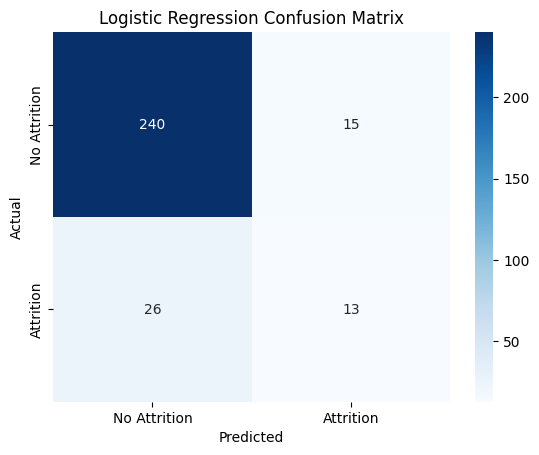

Random Forest Performance:
Accuracy: 0.8571
Precision: 0.3333
Recall: 0.0769
F1 Score: 0.1250
ROC AUC: 0.7236


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       255
           1       0.33      0.08      0.12        39

    accuracy                           0.86       294
   macro avg       0.60      0.53      0.52       294
weighted avg       0.80      0.86      0.82       294



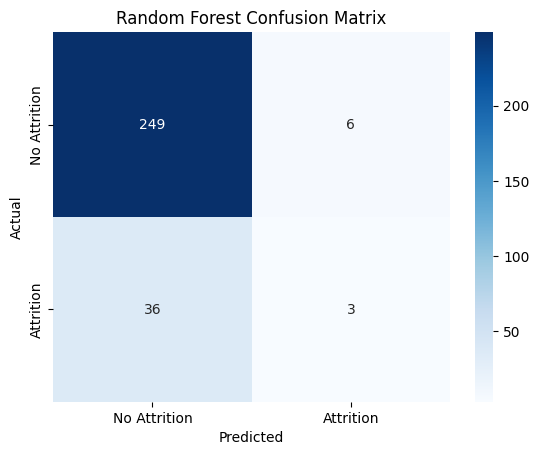

SVM Performance:
Accuracy: 0.8639
Precision: 0.4545
Recall: 0.1282
F1 Score: 0.2000
ROC AUC: 0.7648


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.45      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.67      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



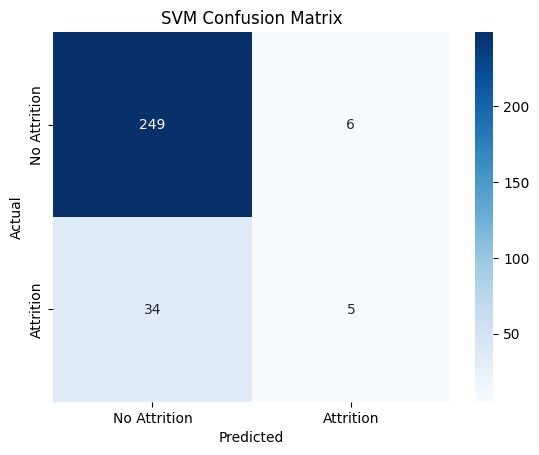

Gradient Boosting Performance:
Accuracy: 0.8503
Precision: 0.3684
Recall: 0.1795
F1 Score: 0.2414
ROC AUC: 0.7666


              precision    recall  f1-score   support

           0       0.88      0.95      0.92       255
           1       0.37      0.18      0.24        39

    accuracy                           0.85       294
   macro avg       0.63      0.57      0.58       294
weighted avg       0.82      0.85      0.83       294



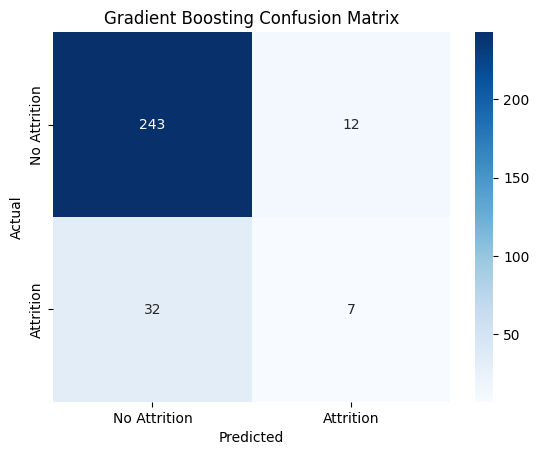

In [17]:
# List of models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'{name} Confusion Matrix')
    plt.show()

# You can now choose the best model based on the evaluation metrics and proceed with further analysis or model tuning.


We can notice based on precision that the all models predict well the major class 'NO' compared to the other class  'yes'.

Let's adjust imbalanced data  using diffrent techgniques

- Apply smote to the trainig data

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a Random Forest model with SMOTE-applied data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_smote = rf.predict(X_test)
print(classification_report(y_test, y_pred_smote))
print(confusion_matrix(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       255
           1       0.42      0.26      0.32        39

    accuracy                           0.85       294
   macro avg       0.65      0.60      0.62       294
weighted avg       0.83      0.85      0.84       294

[[241  14]
 [ 29  10]]


- Train the Random forest models with class weights

In [ ]:
# Train a Random Forest model with class weights
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_weighted = rf.predict(X_test)
print(classification_report(y_test, y_pred_weighted))
print(confusion_matrix(y_test, y_pred_weighted))


              precision    recall  f1-score   support

           0       0.87      0.98      0.93       255
           1       0.43      0.08      0.13        39

    accuracy                           0.86       294
   macro avg       0.65      0.53      0.53       294
weighted avg       0.82      0.86      0.82       294

[[251   4]
 [ 36   3]]


- Adjusting threshold

In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict probabilities
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# Set a specific threshold
threshold = 0.3  # Example threshold
y_pred_threshold = (y_pred_proba >= threshold).astype(int)

# Evaluate the model with the new threshold
print(f"Classification Report at threshold {threshold}:\n")
print(classification_report(y_test, y_pred_threshold))
print(f"Confusion Matrix at threshold {threshold}:\n")
print(confusion_matrix(y_test, y_pred_threshold))
print(f"ROC AUC Score at threshold {threshold}: {roc_auc_score(y_test, y_pred_threshold)}\n")




Classification Report at threshold 0.3:

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       255
           1       0.27      0.31      0.29        39

    accuracy                           0.80       294
   macro avg       0.58      0.59      0.59       294
weighted avg       0.81      0.80      0.80       294

Confusion Matrix at threshold 0.3:

[[223  32]
 [ 27  12]]
ROC AUC Score at threshold 0.3: 0.5911010558069382



In [ ]:
# Find the optimal threshold that maximizes the F1 Score
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
optimal_threshold = thresholds[np.argmax(f1_scores)]

print(f"Optimal Threshold: {optimal_threshold}")

y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)
print(f"Classification Report at optimal threshold {optimal_threshold}:\n")
print(classification_report(y_test, y_pred_optimal))
print(f"Confusion Matrix at optimal threshold {optimal_threshold}:\n")
print(confusion_matrix(y_test, y_pred_optimal))
print(f"ROC AUC Score at optimal threshold {optimal_threshold}: {roc_auc_score(y_test, y_pred_optimal)}\n")

Optimal Threshold: 0.22
Classification Report at optimal threshold 0.22:

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       255
           1       0.30      0.54      0.39        39

    accuracy                           0.77       294
   macro avg       0.61      0.67      0.62       294
weighted avg       0.84      0.77      0.80       294

Confusion Matrix at optimal threshold 0.22:

[[206  49]
 [ 18  21]]
ROC AUC Score at optimal threshold 0.22: 0.6731523378582203



Let's try other models to see if the precision will increase or not

Logistic Regression Performance:
Accuracy: 0.7279
Precision: 0.2530
Recall: 0.5385
F1 Score: 0.3443
ROC AUC: 0.7367


              precision    recall  f1-score   support

           0       0.91      0.76      0.83       255
           1       0.25      0.54      0.34        39

    accuracy                           0.73       294
   macro avg       0.58      0.65      0.59       294
weighted avg       0.83      0.73      0.76       294



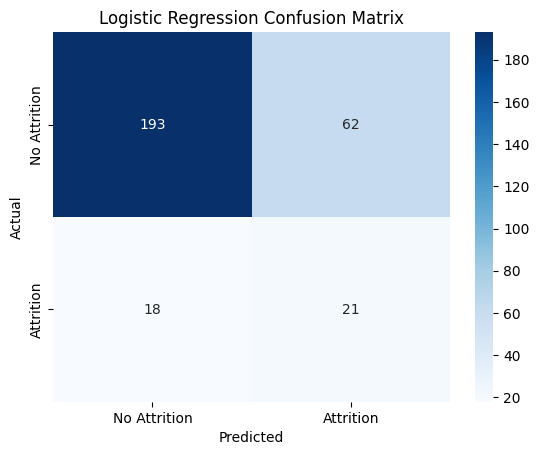

Decision Tree Performance:
Accuracy: 0.7653
Precision: 0.1591
Recall: 0.1795
F1 Score: 0.1687
ROC AUC: 0.5172


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       255
           1       0.16      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.77       294



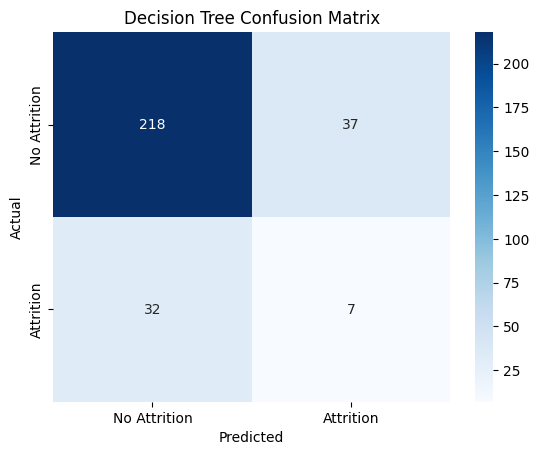

Random Forest Performance:
Accuracy: 0.8537
Precision: 0.4091
Recall: 0.2308
F1 Score: 0.2951
ROC AUC: 0.7309


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       255
           1       0.41      0.23      0.30        39

    accuracy                           0.85       294
   macro avg       0.65      0.59      0.61       294
weighted avg       0.83      0.85      0.84       294



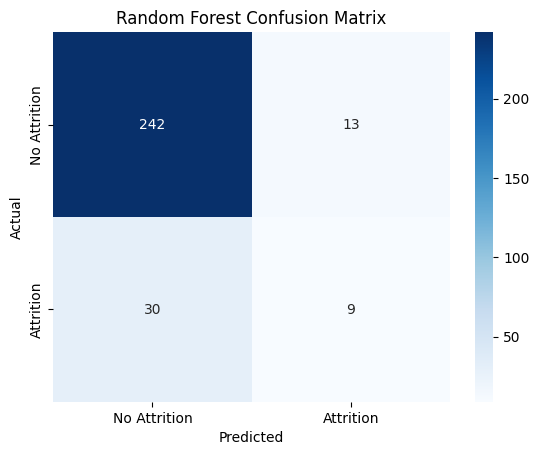

Support Vector Machine Performance:
Accuracy: 0.7823
Precision: 0.2881
Recall: 0.4359
F1 Score: 0.3469
ROC AUC: 0.7152


              precision    recall  f1-score   support

           0       0.91      0.84      0.87       255
           1       0.29      0.44      0.35        39

    accuracy                           0.78       294
   macro avg       0.60      0.64      0.61       294
weighted avg       0.82      0.78      0.80       294



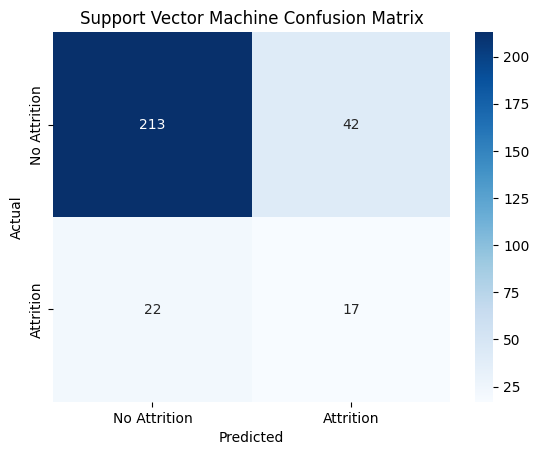

Gradient Boosting Performance:
Accuracy: 0.8741
Precision: 0.5385
Recall: 0.3590
F1 Score: 0.4308
ROC AUC: 0.7848


              precision    recall  f1-score   support

           0       0.91      0.95      0.93       255
           1       0.54      0.36      0.43        39

    accuracy                           0.87       294
   macro avg       0.72      0.66      0.68       294
weighted avg       0.86      0.87      0.86       294



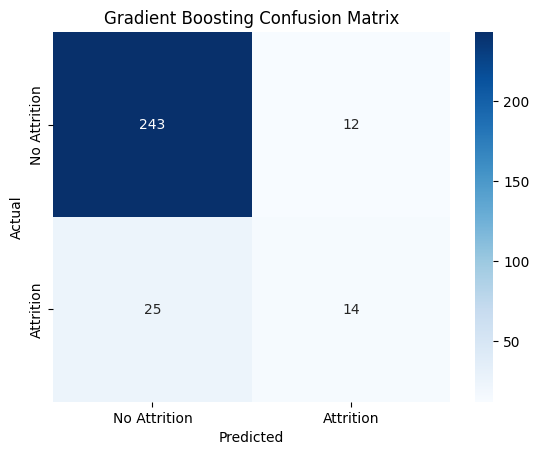

AdaBoost Performance:
Accuracy: 0.8469
Precision: 0.4375
Recall: 0.5385
F1 Score: 0.4828
ROC AUC: 0.7696


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       255
           1       0.44      0.54      0.48        39

    accuracy                           0.85       294
   macro avg       0.68      0.72      0.70       294
weighted avg       0.86      0.85      0.85       294



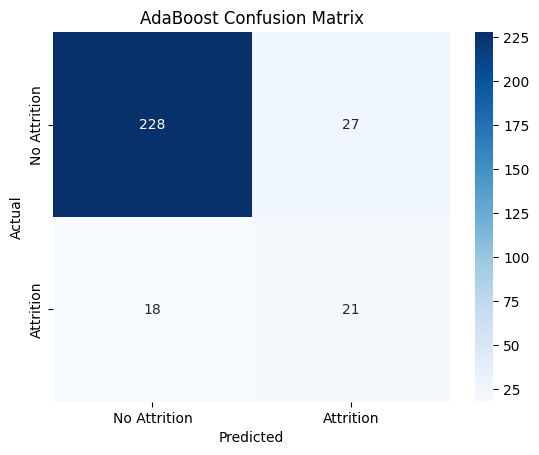

XGBoost Performance:
Accuracy: 0.8367
Precision: 0.3333
Recall: 0.2308
F1 Score: 0.2727
ROC AUC: 0.7282


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       255
           1       0.33      0.23      0.27        39

    accuracy                           0.84       294
   macro avg       0.61      0.58      0.59       294
weighted avg       0.81      0.84      0.82       294



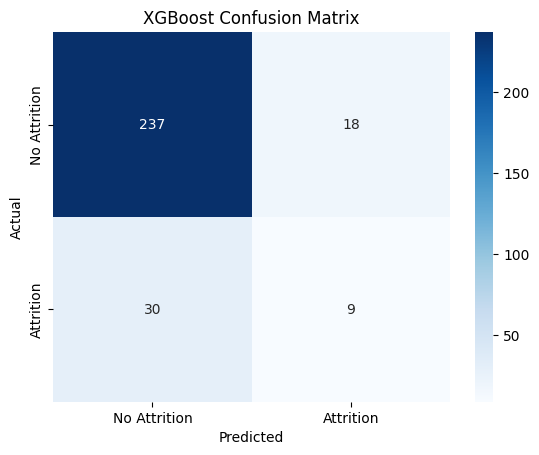

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 978, number of negative: 978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001049 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3565
[LightGBM] [Info] Number of data points in the train set: 1956, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Performance:
Accuracy: 0.8639
Precision: 0.4783
Recall: 0.2821
F1 Score: 0.3548
ROC AUC: 0.7635


              precision    recall  f1-score   support

           0       0.90      0.95      0.92       255
           1       0.48      0.28      0.35        39

    accuracy                           0.86       294
   macro avg       0.69      0.62      0.64       294
weighted avg       0.84      0.86      0.85

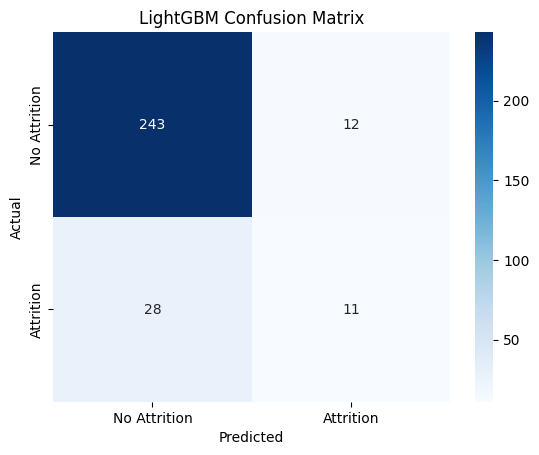

MLP Performance:
Accuracy: 0.8197
Precision: 0.3158
Recall: 0.3077
F1 Score: 0.3117
ROC AUC: 0.6974


              precision    recall  f1-score   support

           0       0.89      0.90      0.90       255
           1       0.32      0.31      0.31        39

    accuracy                           0.82       294
   macro avg       0.61      0.60      0.60       294
weighted avg       0.82      0.82      0.82       294



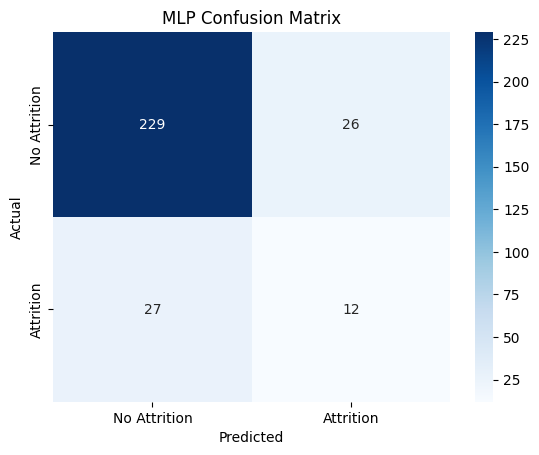

In [ ]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Dictionary of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'MLP': MLPClassifier(max_iter=1000)
}

# Train and evaluate each model
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\n")

    # Classification Report
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Attrition', 'Attrition'], yticklabels=['No Attrition', 'Attrition'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'{name} Confusion Matrix')
    plt.show()
